# 实验报告
<font size=4>
    
+ **姓名：于成俊**
+ **学号：2112066**
+ **专业：密码科学与技术**

</font>

## 实验要求

### **基本要求**
生成两个各包含 N=1000 个二维随机向量的数据集合 $X_1$ 和 $X_2$，数据集合中随机向量来自于三个分布模型，分别满足均值向量 $\mu_1=[1,4]$,$\mu_2=[4,1]$, $\mu_3=[8,4]$ 和协方差矩阵 $D_1=D_2=D_3=2\pmb{I}$ ，其中$\pmb{I}$是 $2*2$的单位矩阵。在生成数据集合 $X_1$ 时，假设来自三个分布模型的先验概率相同 ；而在生成数据集合 $X_2$ 时，先验概率如下：$p(w_1)=0.6$, $p(w_2)=0.3$, $p(w_3)=0.1$


<img src="https://i.loli.net/2021/03/31/7WT8naYPQc9N56x.png" alt="image.png" style="zoom: 40%;" /> 
<img src="https://i.loli.net/2021/03/31/qsetFODzM7IhYaN.png" alt="image.png" style="zoom:40%;" />

在两个数据集合上分别应用“似然率测试规则” 和“最大后验概率规则” 进行分类实验，计算分类错误率，分析实验结果。


### **中级要求**
在两个数据集合上使⽤⾼斯核函数估计⽅法，应⽤“似然率测试规则”分类和“最大后验概率规则”在 [0.1, 0.5, 1, 
1.5, 2] 范围内交叉验证找到最优 h 值，分析实验结果

### **高级要求**
在两个数据集合上使⽤进⾏k-近邻概率密度估计，计算并分析 k=1，3，5 时的概率密度估计结果

## 实验流程
###  **基本要求**

#### **导入相关包**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### **生成数据集**

定义生成数据集的函数，返回数据集$X$和样本类别。

In [2]:
# 生成数据集
def Generate_Data(p1,p2,p3):
    # 设置随机种子以便复现结果
    np.random.seed(0)
    # 定义均值向量和协方差矩阵
    u1 = np.array([1, 4])
    u2 = np.array([4, 1])
    u3 = np.array([8, 4])
    cov_matrix = 2 * np.eye(2)  # 2*2单位矩阵
    # 生成数据集合X
    N = 1000  # 向量个数
    prior_prob = [p1, p2, p3]  # 三个分布的先验概率
    X = []  # 用于存储数据点
    Y = []  # 用于存储每个样本的类别
    for _ in range(N):
        # 按照概率随机抽取一个分布
        model_idx = np.random.choice(3, p=prior_prob)

        # 生成满足相应条件的多元正态分布的随机样本
        if model_idx == 0:
            x = np.random.multivariate_normal(u1, cov_matrix)
        elif model_idx == 1:
            x = np.random.multivariate_normal(u2, cov_matrix)
        else:
            x = np.random.multivariate_normal(u3, cov_matrix)

        X.append(x)
        Y.append(model_idx + 1)  # 将样本的类别添加到y中

    return np.array(X), np.array(Y)

In [3]:
# 生成数据集X1、X2和样本类别Y1、Y2
X1, Y1 = Generate_Data(1/3, 1/3, 1/3)
X2, Y2 = Generate_Data(0.6, 0.3, 0.1)

#### **进行分类实验**

定义计算多元正态分布的概率密度函数的函数

In [4]:
# 计算多元正态分布的概率密度函数 (PDF)
def multivariate_normal_pdf(x, mean, cov_matrix):
    # x的特征数量
    n = len(x)
    # 计算协方差矩阵 cov_matrix 的行列式
    det = np.linalg.det(cov_matrix)
    # 计算(2π)^(n/2)
    sqrt_2pi_n = (2 * np.pi) ** (n / 2)
    # 计算数据点 x 与均值向量 mean 之间的差异（向量减法）
    diff = x - mean
    # 计算协方差矩阵的逆矩阵
    inv_cov = np.linalg.inv(cov_matrix)
    # 计算指数部分
    exponent = -0.5 * np.dot(np.dot(diff, inv_cov), diff)
    # 计算概率密度
    pdf = (1 / (sqrt_2pi_n * np.sqrt(det))) * np.exp(exponent)

    return pdf

定义应用"似然率测试规则"进行分类实验的函数

In [5]:
# 似然率测试规则
def Likelihood_Ratio_Test(X, Y):
    # 初始化分类错误计数
    error_count = 0
    # 定义均值向量和协方差矩阵
    u1 = np.array([1, 4])
    u2 = np.array([4, 1])
    u3 = np.array([8, 4])
    cov_matrix = 2 * np.eye(2)  # 2*2单位矩阵
    N = 1000  # 向量个数
    # 循环迭代数据集中的每个数据点 x
    for x, y in zip(X, Y):
        # 用于存储每个模型的似然值
        likelihoods = []
        for mean in [u1, u2, u3]:
            # 计算了数据点 x 在给定均值 mean 和协方差矩阵 cov_matrix 下的似然值
            likelihood = multivariate_normal_pdf(x, mean=mean, cov_matrix=cov_matrix)
            likelihoods.append(likelihood)
        # 用于找到具有最大似然值的模型的索引
        # 再加1得到模型号
        predicted_model = np.argmax(likelihoods) + 1

        if predicted_model != y:  # 若正确分类应该等于y
            error_count += 1

    error_rate_X_likelihood = error_count / N

    return error_rate_X_likelihood

定义应用"最大后验概率规则"进行分类实验的函数，其中用到了后验概率正比于先验概率和似然函数之积。

In [6]:
# 最大后验概率规则
def MAP_Rule_Test(X, Y, p1, p2, p3):
    # 初始化分类错误计数
    error_count = 0
    # 定义均值向量和协方差矩阵
    u1 = np.array([1, 4])
    u2 = np.array([4, 1])
    u3 = np.array([8, 4])
    cov_matrix = 2 * np.eye(2)  # 2*2单位矩阵
    N = 1000  # 向量个数
    prior_prob = [p1, p2, p3]  # 三个分布的先验概率
    # 循环迭代数据集中的每个数据点 x
    for x, y in zip(X, Y):
        posterior_probabilities = []
        for i, mean in enumerate([u1, u2, u3]):
            likelihood = multivariate_normal_pdf(x, mean=mean, cov_matrix=cov_matrix)
            posterior_probability = likelihood * prior_prob[i]
            posterior_probabilities.append(posterior_probability)
        # 用于找到具有最大后验概率的模型的索引
        # 再加1得到模型号
        predicted_model = np.argmax(posterior_probabilities) + 1

        if predicted_model != y:  # 若正确分类应该为y
            error_count += 1

    error_rate_X_MAP = error_count / N
    return error_rate_X_MAP

在数据集X1和X2上分别应用**似然率测试规则**进行分类实验，计算分类错误率

In [7]:
error_rate_X1_likelihood = Likelihood_Ratio_Test(X1, Y1)
error_rate_X2_likelihood = Likelihood_Ratio_Test(X2, Y2)

**结果如下**

In [9]:
print("在数据集X1上应用似然率测试规则的分类错误率为{}".format(error_rate_X1_likelihood))
print("在数据集X2上应用似然率测试规则的分类错误率为{}".format(error_rate_X2_likelihood))

在数据集X1上应用似然率测试规则的分类错误率为0.069
在数据集X2上应用似然率测试规则的分类错误率为0.061


在数据集X1和X2上分别应用**最大后验概率规则**进行分类实验，计算分类错误率

In [10]:
error_rate_X1_MAP = MAP_Rule_Test(X1, Y1, 1/3, 1/3, 1/3)
error_rate_X2_MAP = MAP_Rule_Test(X2, Y2,  0.6, 0.3, 0.1)

**结果如下**

In [11]:
print("在数据集X1上应用最大后验概率规则的分类错误率为{}".format(error_rate_X1_MAP))
print("在数据集X2上应用最大后验概率规则的分类错误率为{}".format(error_rate_X2_MAP))

在数据集X1上应用最大后验概率规则的分类错误率为0.069
在数据集X2上应用最大后验概率规则的分类错误率为0.059


###  **中级要求**

定义高斯核函数

In [12]:
# 高斯核函数
def Gaussian_Kernel(x, X, h):
    # x是数据点  X是数据集
    n = len(X)                   # 数据集中数据点数量
    kernel_values = np.zeros(n)  # 将数组中的所有元素都初始化为 0
    # 计算高斯核密度估计的归一化参数
    normalization = 1 / (np.sqrt(2 * np.pi) * h)
    for i in range(n):
        # 计算当前数据点 x 与数据集中的每个数据点 X[i] 之间的差
        difference = x - X[i]
        # 两个向量差的平方和
        squared_distance = np.dot(difference, difference)
        # 计算高斯核函数值
        kernel_values[i] = np.exp(-0.5 * squared_distance / (h ** 2))

    p = normalization * kernel_values.mean()

    return p

我们现在要应⽤“似然率测试规则”分类和“最大后验概率规则”在 [0.1, 0.5, 1, 1.5, 2] 范围内交叉验证找到最优 h 值。令**K折交叉验证**中的k为5。

In [13]:
h_values = [0.1, 0.5, 1, 1.5, 2]
k = 5

首先在数据集上应用**似然率测试规则**，定义如下函数

In [14]:
# 利用高斯核函数的似然率测试规则
def Gaussian_Likelihood(X_test, X_train, Y_test, Y_train, h):
    # 初始化分类错误计数
    error_count = 0
    # 提取模型1
    X1 = X_train[Y_train == 1].copy()  # 创建副本，X1是均值向量为u1的数据集合
    # 提取模型2
    X2 = X_train[Y_train == 2].copy()  # 创建副本，X2是均值向量为u2的数据集合
    # 提取模型3
    X3 = X_train[Y_train == 3].copy()  # 创建副本，X3是均值向量为u3的数据集合
    # 循环迭代测试集中的每个数据点 x_test
    for x_test, y_test in zip(X_test, Y_test):
        # 用于存储每个模型的似然值
        likelihoods = []
        for X_selected in [X1, X2, X3]:
            # 计算数据点 x_test 的高斯核函数值
            likelihood = Gaussian_Kernel(x_test, X_selected, h)
            likelihoods.append(likelihood)
        # 用于找到具有最大似然值的模型的索引
        # 再加1得到模型号
        predicted_model = np.argmax(likelihoods) + 1

        if predicted_model != y_test:  # 若正确分类应该等于y_test
            error_count += 1

    error_rate_X_Gausslike = error_count / len(X_test)

    return error_rate_X_Gausslike

我们再定义下面这个函数，用于对使用⾼斯核函数估计和应⽤似然率测试规则的方法进行**交叉验证**，来找到分类错误率最低的h值，即最优的h，还有对应的分类错误率。

In [15]:
# 对使用⾼斯核函数估计和应⽤似然率测试规则的进行交叉验证
def Gausslike_Cross(X, Y, k, h_values):
    # 划分数据集
    fold_size = len(X) // k
    X_folds = []
    Y_folds = []
    # 随机打乱数据和标签的顺序
    permutation = np.random.permutation(len(X))  # 生成随机数序列
    shuffled_X = X[permutation]  # 获取打乱的数据集
    shuffled_Y = Y[permutation]  # 获取打乱的标签
    # 存储不同h下的分类错误率
    error_rates = []
    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size
        X_fold = shuffled_X[start:end]
        Y_fold = shuffled_Y[start:end]
        X_folds.append(X_fold)
        Y_folds.append(Y_fold)
    # X_folds 和 Y_folds 中包含了5份数据子集和对应的标签子集
    for h in h_values:
        # 分类错误率
        error_rate = 0
        # 依次选择其中的⼀份作为测试集，其他作为训练集。
        for i in range(k):
            # 将其余四份合并成一份训练集
            X_train = np.concatenate(X_folds[:i]+X_folds[i + 1:])
            Y_train = np.concatenate(Y_folds[:i]+Y_folds[i + 1:])
            X_test = X_folds[i]
            Y_test = Y_folds[i]
            error_rate += Gaussian_Likelihood(X_test, X_train, Y_test, Y_train, h)
        error_rates.append(error_rate / k)

    best_h = h_values[np.argmin(error_rates)]
    error_min = min(error_rates)
    print("使用似然率规则最好的h值是:", best_h)
    print("分类错误率为:", error_min)

获取在数据集X1和X2上应用似然率测试规则和高斯核估计的最优h和相应的分类错误率

In [16]:
# 在数据集X1上应用似然率测试规则和高斯核估计
print("在数据集X1上应用似然率测试规则和高斯核估计的交叉验证结果如下: ")
Gausslike_Cross(X1, Y1, k, h_values)
# 在数据集X2上应用似然率测试规则和高斯核估计
print("在数据集X2上应用似然率测试规则和高斯核估计的交叉验证结果如下: ")
Gausslike_Cross(X2, Y2, k, h_values)

在数据集X1上应用似然率测试规则和高斯核估计的交叉验证结果如下: 
使用似然率规则最好的h值是: 1.5
分类错误率为: 0.07
在数据集X2上应用似然率测试规则和高斯核估计的交叉验证结果如下: 
使用似然率规则最好的h值是: 2
分类错误率为: 0.05800000000000001


接下来，在数据集上应用**最大后验概率规则**，定义如下函数

In [17]:
# 利用高斯核函数的最大后验概率规则
def Gaussian_MAP(X_test, X_train, Y_test, Y_train, h, p1, p2, p3):
    # 初始化分类错误计数
    error_count = 0
    # 提取模型1
    X1 = X_train[Y_train == 1].copy()  # 创建副本，X1是均值向量为u1的数据集合
    # 提取模型2
    X2 = X_train[Y_train == 2].copy()  # 创建副本，X2是均值向量为u2的数据集合
    # 提取模型3
    X3 = X_train[Y_train == 3].copy()  # 创建副本，X3是均值向量为u3的数据集合
    # 三个分布的先验概率
    prior_prob = [p1, p2, p3]
    # 循环迭代数据集中的每个数据点 x_test
    for x_test, y_test in zip(X_test, Y_test):
        posterior_probabilities = []
        # enumerate() 函数用于在迭代过程中同时获取元素和它们的索引
        for i, X_selected in enumerate([X1, X2, X3]):
            # 计算数据点 x_test 的高斯核函数值
            likelihood = Gaussian_Kernel(x_test, X_selected, h)
            posterior_probability = likelihood * prior_prob[i]
            posterior_probabilities.append(posterior_probability)
        # 用于找到具有最大后验概率的模型的索引
        # 再加1得到模型号
        predicted_model = np.argmax(posterior_probabilities) + 1

        if predicted_model != y_test:  # 若正确分类应该为y
            error_count += 1

    error_rate_X_GaussMAP = error_count / len(X_test)
    return error_rate_X_GaussMAP

还有相应的**交叉验证函数**

In [18]:
# 对使用⾼斯核函数估计和应⽤最大后验概率规则的进行交叉验证
def GaussMAP_Cross(X, Y, k, h_values, p1, p2, p3):
    # 划分数据集
    fold_size = len(X) // k
    X_folds = []
    Y_folds = []
    # 随机打乱数据和标签的顺序
    permutation = np.random.permutation(len(X))  # 生成随机数序列
    shuffled_X = X[permutation]  # 获取打乱的数据集
    shuffled_Y = Y[permutation]  # 获取打乱的标签
    # 存储不同h下的分类错误率
    error_rates = []
    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size
        X_fold = shuffled_X[start:end]
        Y_fold = shuffled_Y[start:end]
        X_folds.append(X_fold)
        Y_folds.append(Y_fold)
    # X_folds 和 Y_folds 中包含了5份数据子集和对应的标签子集
    for h in h_values:
        # 分类错误率
        error_rate = 0
        # 依次选择其中的⼀份作为测试集，其他作为训练集。
        for i in range(k):
            # 将其余四份合并成一份训练集
            X_train = np.concatenate(X_folds[:i]+X_folds[i + 1:])
            Y_train = np.concatenate(Y_folds[:i]+Y_folds[i + 1:])
            X_test = X_folds[i]
            Y_test = Y_folds[i]
            error_rate += Gaussian_MAP(X_test, X_train, Y_test, Y_train, h, p1, p2, p3)
        error_rates.append(error_rate / k)

    best_h = h_values[np.argmin(error_rates)]
    error_min = min(error_rates)
    print("使用最大后验概率最好的h值是:", best_h)
    print("分类错误率为:", error_min)

获取在数据集X1和X2上应用最大后验概率规则和高斯核估计的最优h和相应的分类错误率

In [19]:
# 在数据集X1上应用最大后验概率规则和高斯核估计
print("在数据集X1上应用最大后验概率规则和高斯核估计的交叉验证结果如下: ")
GaussMAP_Cross(X1, Y1, k, h_values, 1/3, 1/3, 1/3)
# 在数据集X2上应用最大后验概率规则和高斯核估计
print("在数据集X2上应用最大后验概率规则和高斯核估计的交叉验证结果如下: ")
GaussMAP_Cross(X2, Y2, k, h_values, 0.6, 0.3, 0.1)

在数据集X1上应用最大后验概率规则和高斯核估计的交叉验证结果如下: 
使用最大后验概率最好的h值是: 2
分类错误率为: 0.069
在数据集X2上应用最大后验概率规则和高斯核估计的交叉验证结果如下: 
使用最大后验概率最好的h值是: 0.5
分类错误率为: 0.057999999999999996


###  **高级要求**

定义计算欧几里得距离的函数

In [21]:
# 计算欧氏距离
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

定义**k-近邻概率密度估计函数**

In [22]:
# knn概率密度估计函数
def knn_density_estimation(X, Y, k):
    # 样本数量
    N = len(X)
    # 存储每个采样点不同模型下的概率密度函数
    p = []
    # 遍历每个数据点
    for x ,y in zip(X, Y):
        # 用于存储距离和类别
        temp = []
        for x_, y_ in zip(X, Y):
            distance = euclidean_distance(x, x_)

            if distance == 0.0 or distance == 0:
                continue

            temp.append([distance, y_])
        temp = np.array(temp)
        # 第一列是距离，按照距离进行排序
        temp = temp[np.argsort(temp[:, 0])]
        # 选择前k个最近的点
        choose = temp[:k]
        # 以与第k个点的距离为半径求圆面积S
        S = np.pi*temp[k-1][0]
        # 计算前k个点中每个模型的数量
        count1 = sum(choose[:, 1] == 1)
        count2 = sum(choose[:, 1] == 2)
        count3 = sum(choose[:, 1] == 3)
        # 计算每个采样点的对应于不同模型的概率密度函数
        result = []
        result.append(count1 / (S * N))
        result.append(count2 / (S * N))
        result.append(count3 / (S * N))
        p.append(result)
    # 将其转化为np数组
    return np.array(p)

接下来展示在 k=1，3，5 时，每个模型下knn概率密度估计的结果

首先展示在**数据集X1**上:

**k=1时**

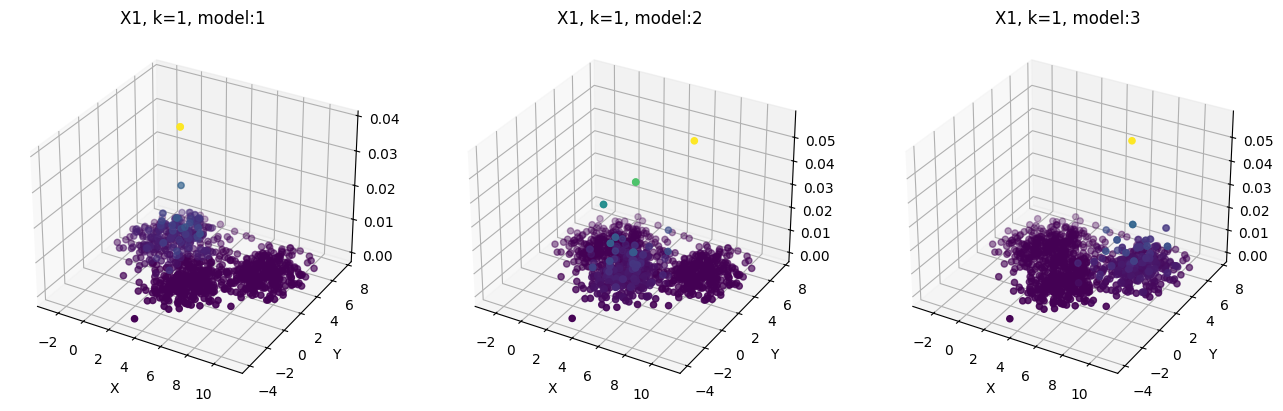

In [32]:
X = X1
Y = Y1
k = 1
# 获取概率密度
p = knn_density_estimation(X1, Y1, k)
# 创建一个三维散点图
fig = plt.figure(figsize=(16, 12))
# 创建3个3D子图
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
# 绘制散点图并使用密度值作为颜色
ax1.scatter(X[:, 0], X[:, 1], p[:,0], c=p[:,0], cmap='viridis')
ax2.scatter(X[:, 0], X[:, 1], p[:,1], c=p[:,1], cmap='viridis')
ax3.scatter(X[:, 0], X[:, 1], p[:,2], c=p[:,2], cmap='viridis')
# 设置标题
ax1.set_title("X{}, k={}, model:{}".format(1, k, 1))
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.set_title("X{}, k={}, model:{}".format(1, k, 2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax3.set_title("X{}, k={}, model:{}".format(1, k, 3))
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
plt.show()

**k=3时**

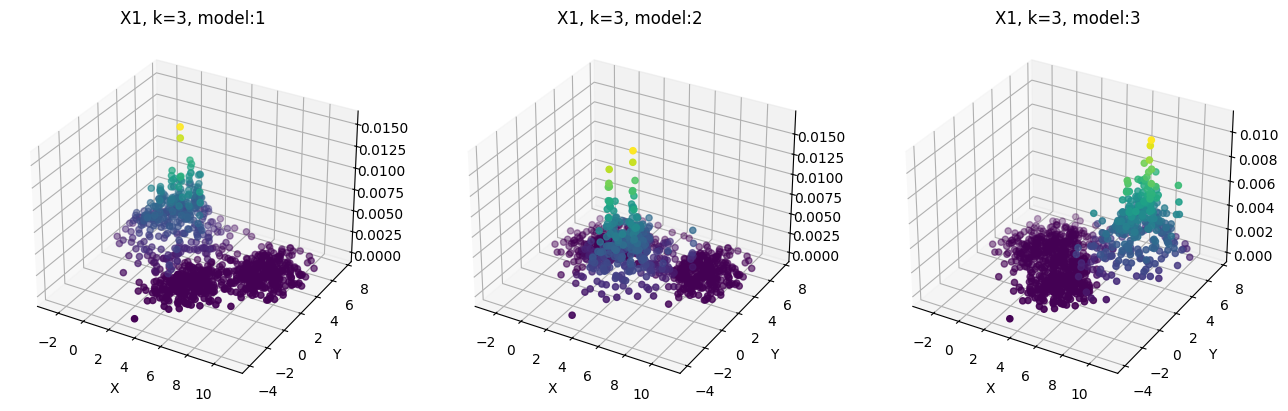

In [36]:
X = X1
Y = Y1
k = 3
# 获取概率密度
p = knn_density_estimation(X1, Y1, k)
# 创建一个三维散点图
fig = plt.figure(figsize=(16, 12))
# 创建3个3D子图
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
# 绘制散点图并使用密度值作为颜色
ax1.scatter(X[:, 0], X[:, 1], p[:,0], c=p[:,0], cmap='viridis')
ax2.scatter(X[:, 0], X[:, 1], p[:,1], c=p[:,1], cmap='viridis')
ax3.scatter(X[:, 0], X[:, 1], p[:,2], c=p[:,2], cmap='viridis')
# 设置标题
ax1.set_title("X{}, k={}, model:{}".format(1, k, 1))
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.set_title("X{}, k={}, model:{}".format(1, k, 2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax3.set_title("X{}, k={}, model:{}".format(1, k, 3))
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
plt.show()

**k=5时**

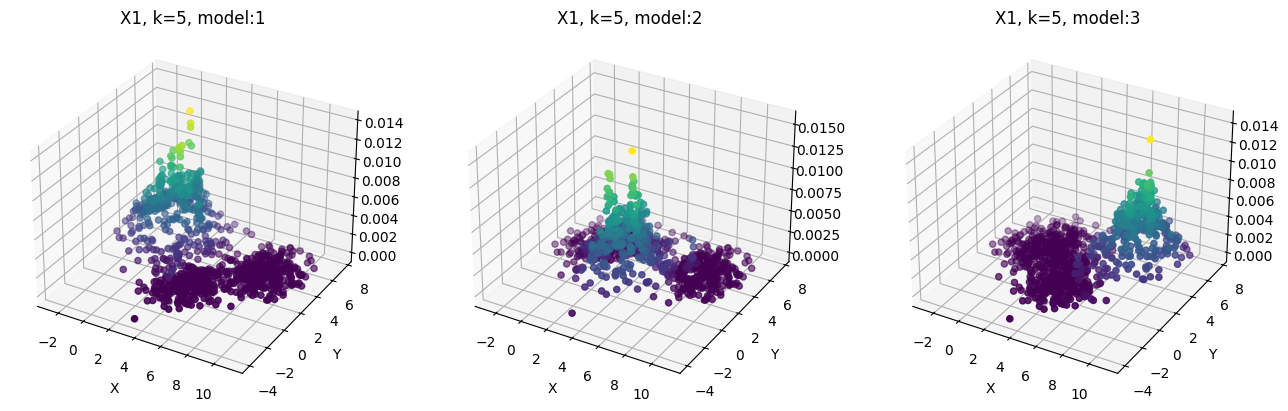

In [37]:
X = X1
Y = Y1
k = 5
# 获取概率密度
p = knn_density_estimation(X1, Y1, k)
# 创建一个三维散点图
fig = plt.figure(figsize=(16, 12))
# 创建3个3D子图
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
# 绘制散点图并使用密度值作为颜色
ax1.scatter(X[:, 0], X[:, 1], p[:,0], c=p[:,0], cmap='viridis')
ax2.scatter(X[:, 0], X[:, 1], p[:,1], c=p[:,1], cmap='viridis')
ax3.scatter(X[:, 0], X[:, 1], p[:,2], c=p[:,2], cmap='viridis')
# 设置标题
ax1.set_title("X{}, k={}, model:{}".format(1, k, 1))
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.set_title("X{}, k={}, model:{}".format(1, k, 2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax3.set_title("X{}, k={}, model:{}".format(1, k, 3))
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
plt.show()

最后展示在**数据集X2**上:

**k=1时**

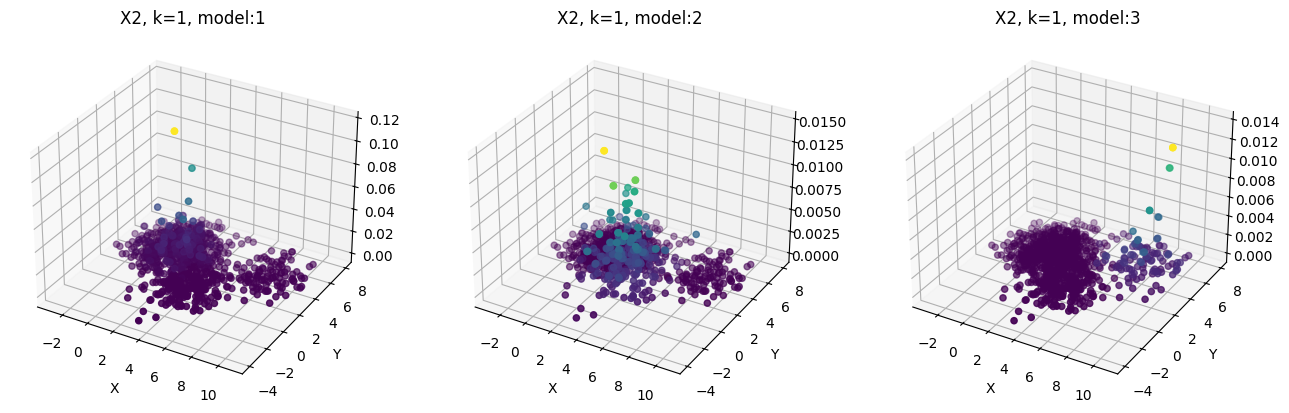

In [38]:
X = X2
Y = Y2
k = 1
# 获取概率密度
p = knn_density_estimation(X2, Y2, k)
# 创建一个三维散点图
fig = plt.figure(figsize=(16, 12))
# 创建3个3D子图
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
# 绘制散点图并使用密度值作为颜色
ax1.scatter(X[:, 0], X[:, 1], p[:,0], c=p[:,0], cmap='viridis')
ax2.scatter(X[:, 0], X[:, 1], p[:,1], c=p[:,1], cmap='viridis')
ax3.scatter(X[:, 0], X[:, 1], p[:,2], c=p[:,2], cmap='viridis')
# 设置标题
ax1.set_title("X{}, k={}, model:{}".format(2, k, 1))
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.set_title("X{}, k={}, model:{}".format(2, k, 2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax3.set_title("X{}, k={}, model:{}".format(2, k, 3))
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
plt.show()

**k=3时**

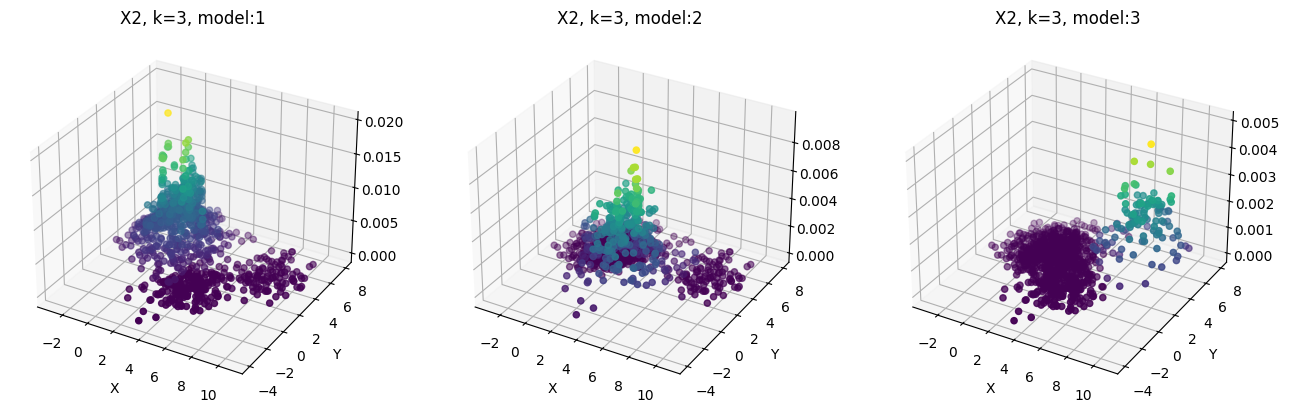

In [39]:
X = X2
Y = Y2
k = 3
# 获取概率密度
p = knn_density_estimation(X2, Y2, k)
# 创建一个三维散点图
fig = plt.figure(figsize=(16, 12))
# 创建3个3D子图
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
# 绘制散点图并使用密度值作为颜色
ax1.scatter(X[:, 0], X[:, 1], p[:,0], c=p[:,0], cmap='viridis')
ax2.scatter(X[:, 0], X[:, 1], p[:,1], c=p[:,1], cmap='viridis')
ax3.scatter(X[:, 0], X[:, 1], p[:,2], c=p[:,2], cmap='viridis')
# 设置标题
ax1.set_title("X{}, k={}, model:{}".format(2, k, 1))
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.set_title("X{}, k={}, model:{}".format(2, k, 2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax3.set_title("X{}, k={}, model:{}".format(2, k, 3))
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
plt.show()

**k=5时**

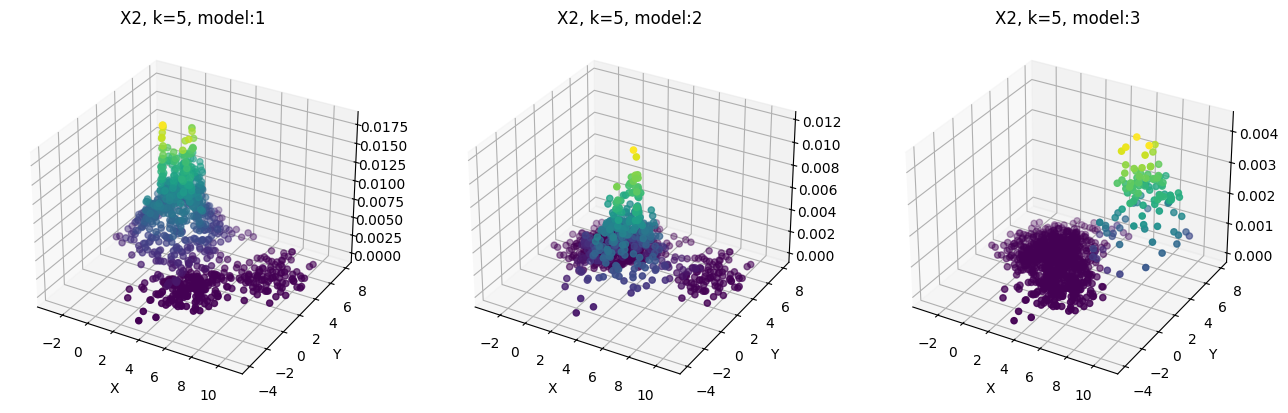

In [40]:
X = X2
Y = Y2
k = 5
# 获取概率密度
p = knn_density_estimation(X2, Y2, k)
# 创建一个三维散点图
fig = plt.figure(figsize=(16, 12))
# 创建3个3D子图
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
# 绘制散点图并使用密度值作为颜色
ax1.scatter(X[:, 0], X[:, 1], p[:,0], c=p[:,0], cmap='viridis')
ax2.scatter(X[:, 0], X[:, 1], p[:,1], c=p[:,1], cmap='viridis')
ax3.scatter(X[:, 0], X[:, 1], p[:,2], c=p[:,2], cmap='viridis')
# 设置标题
ax1.set_title("X{}, k={}, model:{}".format(2, k, 1))
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.set_title("X{}, k={}, model:{}".format(2, k, 2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax3.set_title("X{}, k={}, model:{}".format(2, k, 3))
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
plt.show()